<a href="https://colab.research.google.com/github/veniaibinder/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
#replicate the lecture
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'a': [1,3,2,4,3,5], 'b': [4,6,5,7,6,8]})

df.head()


,a,b
0,1,4
1,3,6
2,2,5
3,4,7
4,3,6


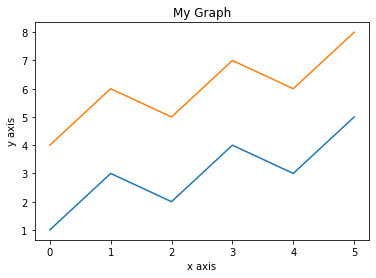

In [0]:

df['a'].plot()
plt.title('My Graph')
plt.xlabel('x axis')
plt.ylabel('y axis')
df['b'].plot()
plt.show()

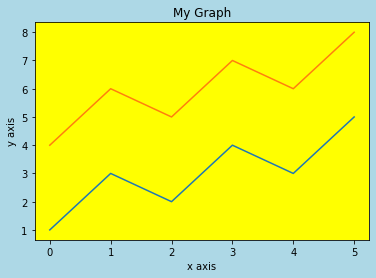

In [0]:
fig, ax = plt.subplots()

ax.plot(df['a'])
ax.plot(df['b'])

fig.patch.set_facecolor('lightblue')

ax.set_facecolor('yellow')

ax.set_title('My Graph')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

plt.show()

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

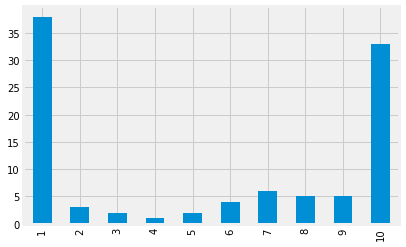

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar();

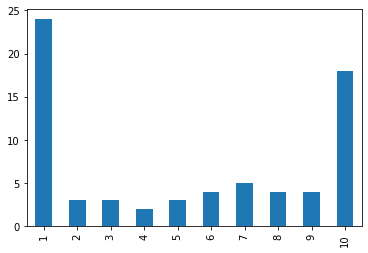

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar();

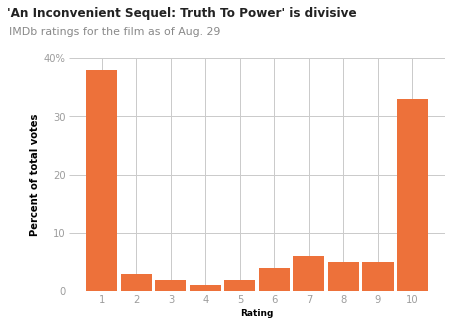

In [0]:
#Replicating and trying to make it pixel perfect
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots()

fig.patch.set_facecolor('white')

# put bars on the graph
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=.9)

ax.set_facecolor('white')

# y-axis tick marks and tick labels
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, color='#9D9D9D')

# x-axis tick marks and tick labels
ax.set_xticks(range(1,11,1))
ax.set_xticklabels(range(1,11,1), fontsize=10, color='#9D9D9D')

# x axis label
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# y axis label
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# graph title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", x=.30, y=1.15, fontsize='12', fontweight='bold', color = '#222222')

# graph subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.7, y=44, fontsize='11', color = '#898989')

# Remove Spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png?w=575'
example = Image(url=url, width=400)

display(example)

Please ignore my work below, I went to Ryan's extra hours and he highly suggested to use fake data set so we will not be frustrated. 

In [0]:
#Article: https://fivethirtyeight.com/features/how-actblue-is-trying-to-turn-small-donations-into-a-blue-wave/
#Image URL: https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue-1.png?w=575
#data: https://raw.githubusercontent.com/fivethirtyeight/actblue-analysis/bd30e88c6f93267c79f7a3c12d9aad6d30242c9b/data/actblue_congress_contribs_by_day.csv


df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/actblue-analysis/bd30e88c6f93267c79f7a3c12d9aad6d30242c9b/data/actblue_congress_contribs_by_day.csv')

print(df.shape)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df.head()

(2100, 4)


,Unnamed: 0,contribution_date,sum,count
0,0,2013-01-01,9878.94,167
1,1,2013-01-02,8158.56,304
2,2,2013-01-03,5105.80,201
3,3,2013-01-04,5070.50,159
4,4,2013-01-05,5453.94,140


In [0]:
df.dtypes

Unnamed: 0             int64
contribution_date     object
sum                  float64
count                  int64
dtype: object

In [0]:
df['contribution_date'] = pd.to_datetime(df['contribution_date'], errors='coerce')


In [0]:
df['year'] = df['contribution_date'].dt.year
df.head()

,Unnamed: 0,contribution_date,sum,count,year
0,0,2013-01-01,9878.94,167,2013.0
1,1,2013-01-02,8158.56,304,2013.0
2,2,2013-01-03,5105.80,201,2013.0
3,3,2013-01-04,5070.50,159,2013.0
4,4,2013-01-05,5453.94,140,2013.0


In [0]:
df_use = df.drop(['Unnamed: 0', 'contribution_date'], axis=1)
print(df_use)

              sum   count    year
0         9878.94     167  2013.0
1         8158.56     304  2013.0
2         5105.80     201  2013.0
3         5070.50     159  2013.0
4         5453.94     140  2013.0
...           ...     ...     ...
2095   3701844.73   66588  2018.0
2096   6076516.70  125794  2018.0
2097   5047416.55  106100  2018.0
2098  10147367.59  182628  2018.0
2099          NaN       2     NaN

[2100 rows x 3 columns]


In [0]:
df_use.isnull().sum()

sum      1
count    0
year     1
dtype: int64

In [0]:
index_df = pd.DataFrame(df_use.columns.values)
index_df.columns = ['index']
print(index_df)

   index
0    sum
1  count
2   year


In [0]:
df.plot(kind='bar',x='year[2014]',y='count')


In [0]:
df['year'].dtypes

dtype('float64')

My work started here : Replicating graph from 538 

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2018/10/actblue_32.png?w=575'
example = Image(url=url, width=500)

display(example)


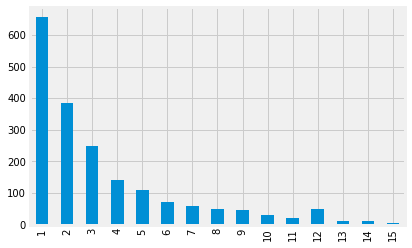

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake1 = pd.Series([656, 385, 250, 140, 110, 70, 60, 50, 45, 30, 20, 50, 10,10,5], 
                 index=range(1,16))

x = fake1.plot.bar();


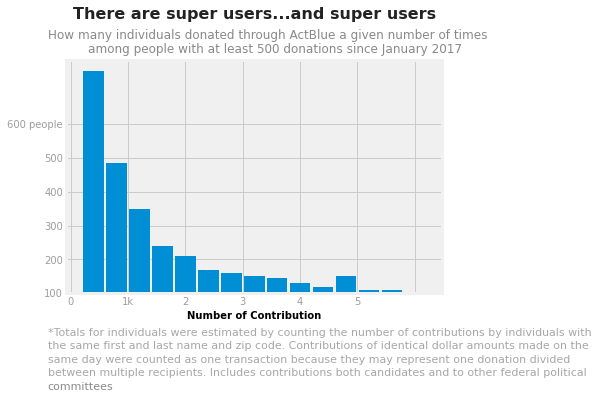

In [0]:
#pur bar on graphs
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.bar(x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], height=fake1, color='#008FD5', width=.9)
fig.patch.set_facecolor('white')

# x-axis tick marks and tick labels
ax.set_xticklabels([-1,0,'1k',2,3,4,5], fontsize=10, color='#9D9D9D')

#y-axis
ax.set_yticks(range(0,600,100))
ax.set_yticklabels(['100', '200', '300', '400', '500', '600 people'], fontsize=10, color='#9D9D9D')

#x axis lable
#ax.text(s='IMDb ratings for the film as of Aug. 29', x=-1.7, y=44, fontsize='11', color = '#898989')
ax.set_xlabel('Number of Contribution', fontsize=10, fontweight='bold')
ax.set_title("There are super users...and super users", x=.50, y=1.15, fontsize='16', fontweight='bold', color = '#222222')
ax.text(s='How many individuals donated through ActBlue a given number of times', x=-1, y=750, fontsize='12', color = '#898989')
ax.text(s='among people with at least 500 donations since January 2017', x=0.75, y=710, fontsize='12', color = '#898989')

ax.text(s='*Totals for individuals were estimated by counting the number of contributions by individuals with', x = -1, y=-125, fontsize='11', color = '#A7A7A7')
ax.text(s='the same first and last name and zip code. Contributions of identical dollar amounts made on the', x = -1, y=-165, fontsize='11', color = '#A7A7A7')
ax.text(s='same day were counted as one transaction because they may represent one donation divided', x = -1, y=-205, fontsize='11', color = '#A7A7A7')
ax.text(s='between multiple recipients. Includes contributions both candidates and to other federal political', x = -1, y=-245, fontsize='11', color = '#A7A7A7')
ax.text(s='committees', x = -1, y=-285, fontsize='11', color = '#898989')
plt.show()
#I know its not pixel perfect but I am kinda proud of the result.





# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here